__Predicting film revenue with LinearRegression__

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

In [768]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,RANSACRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
np.warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('allFilms1.csv')
data=data.drop('Unnamed: 0',axis=1)
data=data.reset_index(drop=True)
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres_x,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2009.0,2.787965e+09,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Avatar,False,7.2,12114.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2007.0,9.610000e+08,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pirates of the Caribbean: At World's End,False,6.9,4627.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015.0,8.806746e+08,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,Spectre,False,6.3,4552.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2012.0,1.084939e+09,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Dark Knight Rises,False,7.6,9263.0
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2012.0,2.841391e+08,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,John Carter,False,6.1,2170.0


In [4]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres_x', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget_x', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'movie_facebook_likes', 'adult', 'budget_y', 'genres_y',
       'id', 'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'video', 'vote_average',
       'vote_count'],
      dtype='object')

In [512]:
data.shape

(4458, 48)

In [513]:
data=data.drop_duplicates()

In [514]:
data.shape

(4415, 48)

__Defining correlations between revenue and other variables:__

In [515]:
corr=data.corr()

In [516]:
corr.revenue.sort_values(ascending=False)#looks like budget could be a predictive variable for revenue

revenue                      1.000000
gross                        0.925808
vote_count                   0.778852
budget_y                     0.733556
num_voted_users              0.624731
num_user_for_reviews         0.571231
num_critic_for_reviews       0.539220
popularity                   0.455392
movie_facebook_likes         0.431160
actor_3_facebook_likes       0.302474
actor_2_facebook_likes       0.271659
duration                     0.264966
runtime                      0.259743
cast_total_facebook_likes    0.233867
imdb_score                   0.194924
vote_average                 0.191242
actor_1_facebook_likes       0.143118
budget_x                     0.141102
director_facebook_likes      0.129395
title_year                   0.121713
release_date                 0.121713
id                          -0.005436
video                       -0.008011
facenumber_in_poster        -0.035202
adult                             NaN
Name: revenue, dtype: float64

__Plotting budget vs. revenue:__

In [27]:
sns.set(style='whitegrid',context='notebook',rc={'figure.figsize':(11,8)})

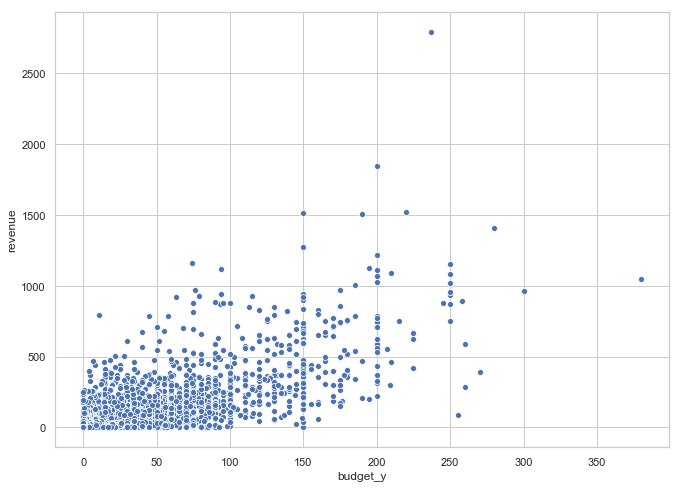

In [517]:
ax=sns.scatterplot(data.budget_y/1000000,data.revenue/1000000)

In [590]:
X=data.budget_y.values.reshape(-1,1)
y=data.revenue.values.reshape(-1,1)

__Scaling the variables for linear regression:__

In [591]:
sc_x=StandardScaler()
sc_y=StandardScaler()
X_std=sc_x.fit_transform(X)
y_std=sc_y.fit_transform(y)#[:,np.newaxis]).flatten()

In [592]:
lr=LinearRegression()

In [593]:
lr.fit(X_std,y_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

__Plotting regression line:__

In [24]:
import matplotlib.pyplot as plt

In [594]:
def lin_regplot(X,y,model):
    plt.scatter(X,y)
    plt.plot(X,model.predict(X),color="red")
    return None

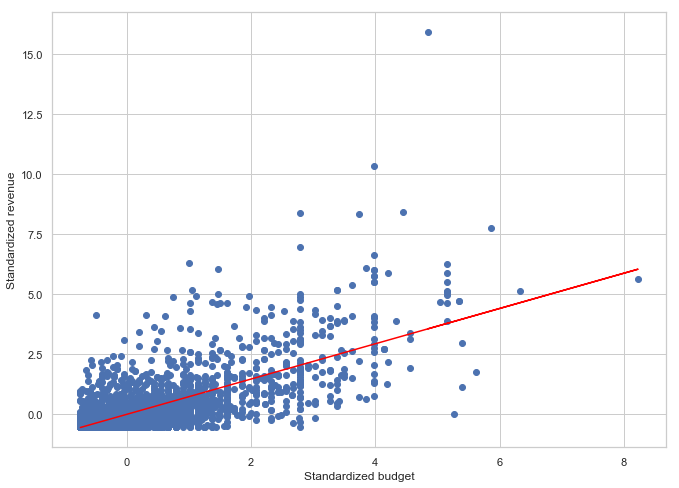

In [595]:
lin_regplot(X_std,y_std,lr)
plt.xlabel('Standardized budget')
plt.ylabel('Standardized revenue')
plt.show()

__Splitting the data into training and test sets:__

In [596]:
X_train, X_test, y_train, y_test=train_test_split(X_std,y_std, test_size=0.2, random_state=123)

In [597]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [598]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

__Plotting predicted values and residus on training and test data:__

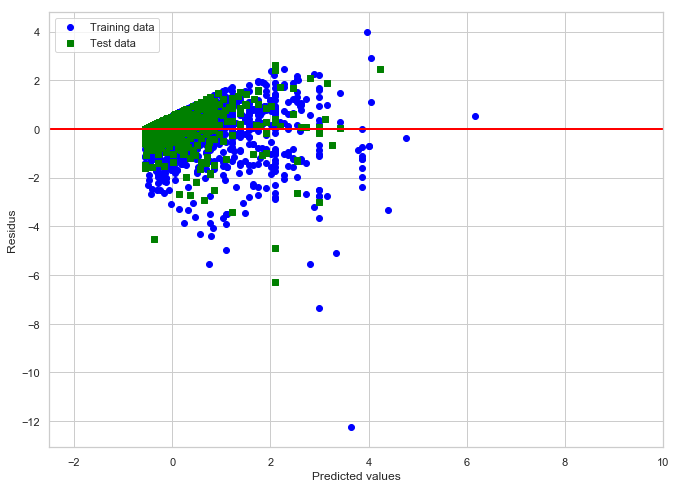

In [599]:
plt.scatter(y_train_pred,y_train_pred-y_train,color='blue',marker='o',label='Training data')
plt.scatter(y_test_pred,y_test_pred-y_test,color='green',marker='s',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residus')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='red')
plt.xlim([-2.5,10])
plt.show()

__Comparing prediction errors on training and test data: mse and R2:__

In [600]:
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))

0.478195048416189
0.3981579247266281


In [601]:
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.5488534429411285
0.47390403158924344


__Using RANSACRegressor to lower the impact of outliers:__

In [602]:
ransac=RANSACRegressor(LinearRegression(),max_trials=10000,min_samples=3532,
                       loss='absolute_loss',residual_threshold=1.0,random_state=0)

In [603]:
ransac.fit(X_train,y_train)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=10000, min_samples=3532, random_state=0,
        residual_threshold=1.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [604]:
y_train_pred=ransac.predict(X_train)
y_test_pred=ransac.predict(X_test)

In [605]:
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))

0.49860267734580965
0.39256844407148545


In [606]:
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.5296001454429067
0.4812895513932244


In [607]:
inlier_mask=ransac.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)

In [608]:
line_X=np.arange(3,10,1)
line_y_ransac=ransac.predict(line_X[:,np.newaxis])

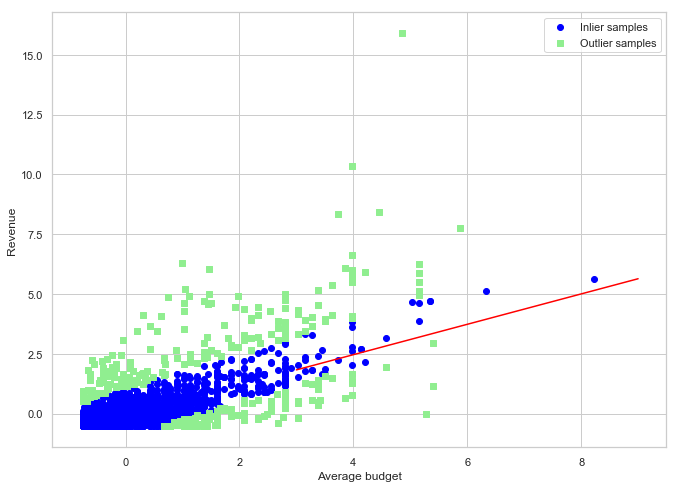

In [609]:
plt.scatter(X_train[inlier_mask],y_train[inlier_mask],c='blue',marker='o',label='Inlier samples')
plt.scatter(X_train[outlier_mask],y_train[outlier_mask],c='lightgreen',marker='s',label='Outlier samples')
plt.plot(line_X,line_y_ransac,color='red')
plt.xlabel('Average budget')
plt.ylabel('Revenue')
plt.legend(loc='lower down')
plt.show()

__Trying the model with PolynomialFeatures:__

In [805]:
poly=PolynomialFeatures(degree=3)

In [806]:
X_poly=poly.fit_transform(X_std)

In [807]:
X_train, X_test, y_train, y_test=train_test_split(X_poly,y_std, test_size=0.2, random_state=123)

In [808]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [809]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [810]:
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))

0.4592348489063732
0.39628165568019297


In [811]:
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.5667411830135811
0.4763831925444376


__Using RandomForestRegressor:__

In [762]:
rf=RandomForestRegressor(min_samples_split=80,max_depth=40,max_leaf_nodes=200,n_estimators=1000)

In [669]:
X_train, X_test, y_train, y_test=train_test_split(X_std,y_std, test_size=0.2, random_state=123)

In [763]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
           max_features='auto', max_leaf_nodes=200,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=80,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [764]:
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)

In [765]:
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))

0.42927306239571367
0.4116135412717033


In [766]:
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.5950082193879364
0.4561247907975262


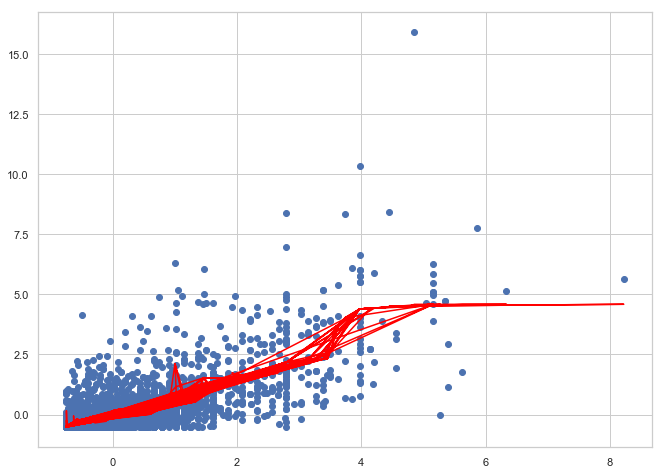

In [776]:
lin_regplot(X_std,y_std,rf)

__The best results were achieved with RANSACRegressor.__